In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords # the for of in with
from nltk.stem.porter import PorterStemmer # loved loving == love
from sklearn.feature_extraction.text import TfidfVectorizer # loved = [0.0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
news_df = pd.read_csv('train.csv')

In [3]:
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news_df.sample(5)

,id,title,author,text,label
19338,19338,Rapper Wiz Khalifa Angers Colombia with Visit ...,Jerome Hudson,A photo of rapper Wiz Khalifa apparently payin...,0
1644,1644,Pro-Life Leaders: Neil Gorsuch ’Reminiscent of...,Dr. Susan Berry,Leaders from 60 national and state groups ar...,0
1871,1871,Will Michelle Obama Be The Replacement Nominee...,Michael Snyder,Posted by Michael Snyder \nI realize that this...,1
15048,15048,"Fake News: NYT, NYDN, HuffPo Report GOP Helpin...",AWR Hawkins,The New York Times (NYT) the New York Daily Ne...,0
5567,5567,"Trump Drops False ‘Birther’ Theory, but Floats...",Maggie Haberman and Alan Rappeport,Donald J. Trump publicly retreated from his “b...,0


In [5]:
news_df["text"].count()

20761

In [6]:
news_df.shape

(20800, 5)

In [7]:
news_df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
news_df = news_df.fillna(' ')

In [9]:
news_df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

label
0    10387
1    10413
Name: text, dtype: int64


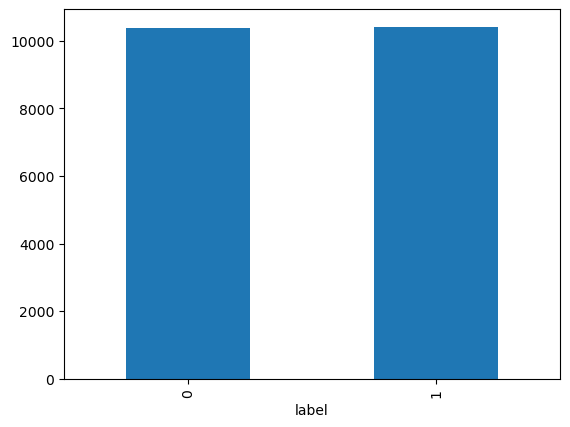

In [10]:
print(news_df.groupby(['label'])['text'].count())
news_df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

# merging

merging the title and author column

In [11]:
news_df['content'] = news_df['author']+" "+news_df['title']

In [12]:
news_df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


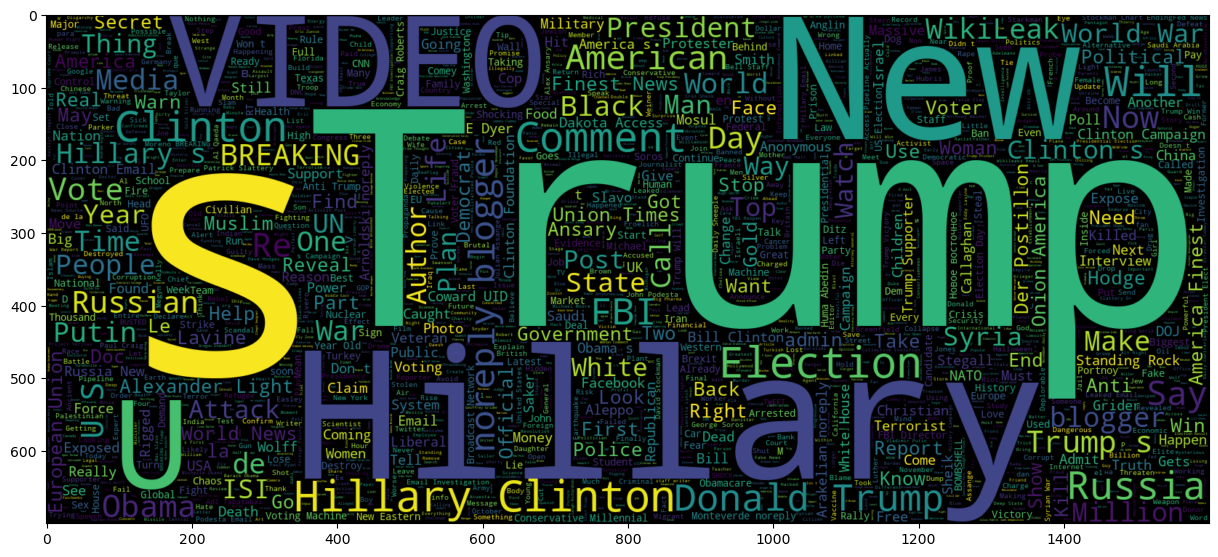

In [13]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(news_df[news_df.label== 1].content))
plt.imshow(wc, interpolation="bilinear")

so here i have got the two main column 1] label 2]content ....with the help of which i'am going to detect the news is fake or true 

# stemming

In [14]:
news_df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

.

so there are several symbols like (:,-.) i need to remove this and also i need to put comma in between each word and also making the first letter into lower case so i am using stemming

In [15]:
# stemming
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
news_df['content'] = news_df['content'].apply(stemming)

In [17]:
news_df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [18]:
X = news_df['content'].values
y = news_df['label'].values

In [19]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [20]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [21]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [22]:
print(y)

[1 0 1 ... 0 1 1]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [24]:
X_train.shape

(16640, 17128)

In [25]:
X_test.shape

(4160, 17128)

# Training the Model: Logistic Regression

In [26]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [27]:
train_y_pred = model.predict(X_train)
print("train accuracy :",accuracy_score(train_y_pred,Y_train))

train accuracy : 0.9865985576923076


In [28]:
test_y_pred = model.predict(X_test)
print("train accuracy :",accuracy_score(test_y_pred,Y_test))

train accuracy : 0.9790865384615385


# Detection System

In [34]:
input_data = X_test[1000]
prediction = model.predict(input_data)

In [35]:
if prediction[0] == 0:
    print('The News Is Fake')
else:
    print('The News is Real')

The News Is Fake


In [31]:
news_df['content'][75]

'josh katz democrat percent chanc retak senat new york time'